In [3]:
import pptk
import numpy as np
import plyfile
import matplotlib.pyplot as plt
from src.vision import database, camera
from src.vision.util import str2double
import glob
from sklearn.neighbors import NearestNeighbors
import src.visual3d.util as vis_util
from src.visual3d import geometry
import timeit


%load_ext autoreload
%autoreload 2
# %matplotlib notebook



In [4]:
root = "data"
image_dataset = database.ImgDataBase(root = root)
# image_dataset.show("DJI_0025.JPG")
# image_dataset.show(5)
# print(image_dataset())
# print(image_dataset.camera_dict['DJI_0015.JPG'])

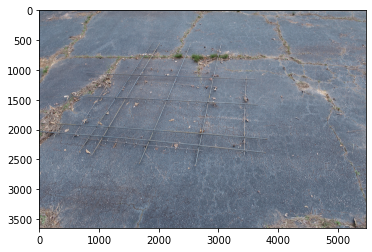

In [10]:
idx = 10
image_dataset.show(10) # 2723,2067
uv_start = [292,1901];uv_end = [3817, 2158]

num_pointOfLine = 5
u_line = np.linspace(uv_start[0],uv_end[0],num=num_pointOfLine)
v_line = np.linspace(uv_start[1],uv_end[1],num=num_pointOfLine)
uv_line = np.c_[u_line,v_line].astype('int')

### 1. Forward Shoot

In [8]:
start_time = timeit.default_timer()

# data directory
root = "data"

# read 3D reconstruction point cloud
point_cloud = vis_util.read_ply_as_PointCloud('data') # read the ply file in data/, should only have 1 ply file

# load image and camera dataset
image_dataset = database.ImgDataBase(root = root)

# add all cameras to visualization
point_cloud.add(vis_util.draw_allCameras(image_dataset))

# compute projection line from camera to 3D world
idx = 10; uv=[ 2723,2067]
projection_point, projection_line, points_filtered = camera.projection_img2world_point(uv,idx,image_dataset,point_cloud.xyz)

# print out the 3D postion of the projection
point_proj = np.mean(projection_point.xyz,axis=0)
# print(f"the world projected position is: {point_proj}")
elapsed = timeit.default_timer() - start_time

print("Time taken : ", elapsed)

Time taken :  5.302693299999998


### 2. Backward Projection

uv = [2721 2066], if_inside = True


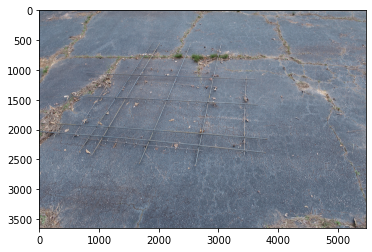

In [9]:
    
uv_projected, if_inside = camera.projection_world2img(point_proj,idx,image_dataset)
print(f"uv = {uv_projected}, if_inside = {if_inside}")
image_dataset.show(idx)

In [10]:
import numpy as np

a = np.array([1])
b = np.vstack((a,a,[]))
print(b)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 2 has size 0